In [1]:
import pandas as pd
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal

In [2]:
x=np.linspace(-8,8,32)
y=np.linspace(-8,8,32)
x,y=np.meshgrid(x,y)
pos=np.empty(x.shape + (2,))
pos.shape

(32, 32, 2)

In [2]:
data=pd.read_csv('test_ass3.txt',names=["x1","x2"])

In [3]:
data

,x1,x2
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [4]:
data.shape

(6, 2)

Given Data

In [5]:
mean1=np.array([0,0])
mean2=np.array([2,2])

covariance1=np.array([[0.25, 0.3],
                      [0.3,1]])
                     
covariance2=np.array([[.5, 0],
                      [0,0.5]])
prior1 = 0.5
prior2 = 0.5

In [6]:
covariance1

array([[0.25, 0.3 ],
       [0.3 , 1.  ]])

In [7]:
data=data.to_numpy()

In [8]:
data[0]

array([1., 1.])

In [9]:
a1=1/(math.sqrt((2*np.pi**2)*abs(np.linalg.det(covariance1))))
a2=1/(math.sqrt((2*np.pi**2)*abs(np.linalg.det(covariance2))))

In [10]:
a1,a2

(0.5626976975981913, 0.45015815807855303)

In [11]:
predicted=[]

for i in range(len(data)):
    
    x1=a1*math.exp( -0.5* np.dot(np.dot( (data[i]-mean1).T, np.linalg.inv(covariance1)),(data[i]-mean1) ))*prior1
    x2=a2*math.exp( -0.5* np.dot(np.dot( (data[i]-mean2).T, np.linalg.inv(covariance2)),(data[i]-mean2) ))*prior2
    
    if x1>x2:
        predicted.append(1)
        
    else:
        predicted.append(2)
    

In [12]:
predicted

[1, 1, 2, 2, 1, 2]

In [13]:
test1=[]
test2=[]

for i in range(len(predicted)):
    
    if predicted[i]==1:
        test1.append(data[i])
    else:
        test2.append(data[i])
    

In [14]:
test1=np.array(test1)
test2=np.array(test2)

In [15]:
test1

array([[ 1.,  1.],
       [ 1., -1.],
       [ 0.,  2.]])

In [16]:
type(test2)

numpy.ndarray

In [17]:
test1[:,0]

array([1., 1., 0.])

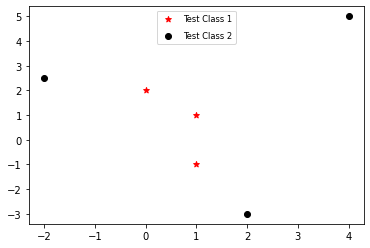

<Figure size 1080x576 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(test1[:,0], test1[:,1],marker='*',color='r',label='Test Class 1')
ax.scatter(test2[:,0], test2[:,1],marker='o',color='k',label='Test Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

In [33]:
X, Y = np.meshgrid( np.linspace(-6,6,300), np.linspace(-6,6,300))

multivariateNormal = multivariate_normal(mean1,covariance1)

Z1 = multivariateNormal.pdf(np.dstack((X, Y)))

multivariateNormal = multivariate_normal(mean2,covariance2)

Z2 = multivariateNormal.pdf(np.dstack((X, Y)))


db=Z1-Z2
print(db)

[[ 6.94986152e-33  1.98300793e-32  5.60145312e-32 ... -1.08485459e-35
  -7.90735213e-36 -5.74502040e-36]
 [ 6.43796517e-33  1.84250440e-32  5.22031132e-32 ... -2.05849618e-35
  -1.50040884e-35 -1.09010946e-35]
 [ 5.94878241e-33  1.70765293e-32  4.85287483e-32 ... -3.89340467e-35
  -2.83784777e-35 -2.06181451e-35]
 ...
 [-1.08485459e-35 -2.05849618e-35 -3.89340467e-35 ... -1.43742970e-14
  -1.04772224e-14 -7.61213814e-15]
 [-7.90735213e-36 -1.50040884e-35 -2.83784777e-35 ... -1.04772224e-14
  -7.63669973e-15 -5.54838016e-15]
 [-5.74502040e-36 -1.09010946e-35 -2.06181451e-35 ... -7.61213814e-15
  -5.54838016e-15 -4.03112909e-15]]


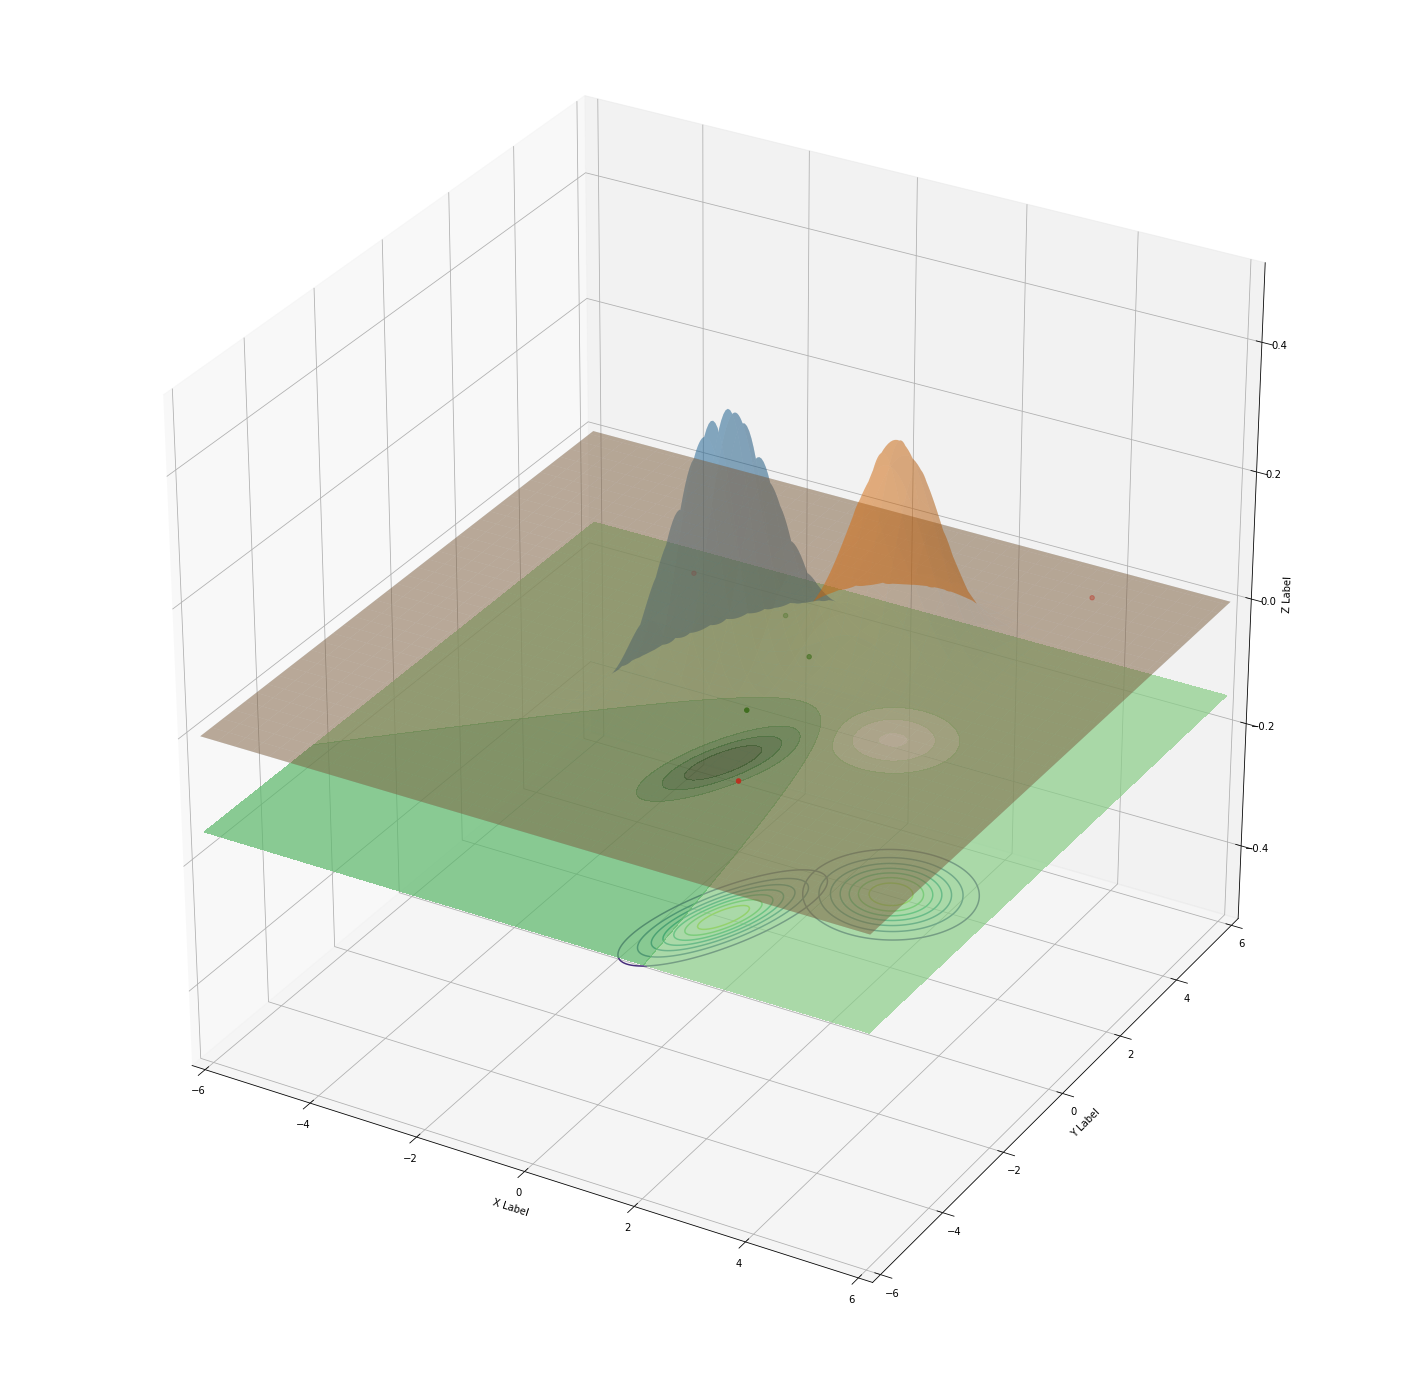

In [34]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z1, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.plot_surface(X, Y, Z2, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


cset = ax.contour(X, Y, Z1, zdir='z', offset=-0.4)
cset = ax.contour(X, Y, Z2, zdir='z', offset=-0.4)

ax.scatter(test1[:,0], test1[:,1], marker='o',color='green')
ax.scatter(test2[:,0], test2[:,1], marker='o',color='red')

ax.contourf(X, Y, db, zdir='z', offset=-.15,alpha=0.7,cmap ='Greens')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_zlim([-.5,.5])

plt.show()